# Assignment 5 - Neural Networks


#### Roll Number: 23100151

### Task Explanation

In this assignment, we will see how changes in the neural network architecture and the hyperparameters can have an effect on how the network performs 

Wheat rust is a devastating plant disease that affects many crops, reducing yields and affecting the livelihoods of farmers and decreasing food security across the continent. The disease is difficult to monitor at a large scale, making it difficult to control and eradicate.

The objective of this challenge is to see how small changes in the model architecture and the hyperparameters can have an effect on the final results. You are required to add screenshots of the results (the accuracy, history and loss graphs and the confusion matrix) with the changes you made in the architecture and the hyperparameters in a pdf file, and submit it along with the code.

ALL THE CODE HAS ALREADY BEEN WRITTEN FOR YOU. YOU ARE ONLY REQUIRED TO MAKE CHANGES IN THE CODE WHERE IT IS ASKED OF YOU

### Let's Start

Make necessary imports here e.g. import cv2, import glob, etc

In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import keras
import random
from keras.datasets import mnist
# any other imports that you may require

### Hyperparameters

CHANGE THESE ONLY WHEN YOU ARE ASKED TO LATER ON IN THE ASSIGNMENT

In [ ]:
batch_size = 32
epochs = 30
learning_rate = 0.0001
input_shape = (256,256,3)

### Data

MAKE NO CHANGES IN THIS PART

In [ ]:
!git clone https://github.com/MMFa666/WheatDiseaseDataset.git

Cloning into 'WheatDiseaseDataset'...
remote: Enumerating objects: 749, done.
remote: Total 749 (delta 0), reused 0 (delta 0), pack-reused 749
Receiving objects: 100% (749/749), 386.05 MiB | 30.22 MiB/s, done.
Checking out files: 100% (877/877), done.


In [ ]:
healthy_wheat = '/content/WheatDiseaseDataset/train/healthy_wheat'
leaf_rust = '/content/WheatDiseaseDataset/train/leaf_rust'
stem_rust = '/content/WheatDiseaseDataset/train/stem_rust'
healthy_wheat_files = glob.glob(healthy_wheat + '/*.jpg')
leaf_rust_files = glob.glob(leaf_rust + '/*.jpg')
stem_rust_files = glob.glob(stem_rust + '/*.jpg')
print(len(healthy_wheat_files))
print(len(leaf_rust_files))
print(len(stem_rust_files))

113
286
300


In [ ]:
train_dir = '/content/WheatDiseaseDataset/train'
train_files = glob.glob(train_dir + '/*/*.jpg')
len(train_files)

699

In [ ]:
x = train_files[0].split('/')
x[4]

'leaf_rust'

In [ ]:
test_dir = '/content/WheatDiseaseDataset/test'
test_files = glob.glob(test_dir + '/*/*.jpg')
len(test_files)

177

### Labels

MAKE NO CHANGES IN THIS PART

In [ ]:
labels={}
labels['healthy_wheat'] = 0
labels['leaf_rust'] = 1
labels['stem_rust'] = 2

### Preprocessing

MAKE NO CHANGES IN THIS PART

In [ ]:
def preprocessing_norm(images):
    return images/255.0

### Batch Generator

MAKE NO CHANGES IN THIS PART

In [ ]:
def parse_path(filename):
  one_hot = [0,0,0]
  x = filename.split('/')
  lab = x[4]
  label = labels[lab]
  one_hot[label] = one_hot[label] + 1
  return one_hot

def get_image(filename):
  img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  image = cv2.resize(img, (256,256))
  return image

def data_generator(data, batch_size):
  total_size = len(data)
  indexes = np.arange(0, total_size, batch_size)
  if total_size % batch_size != 0:
    indexes = indexes[:-1]  
  while True:
    np.random.shuffle(indexes)
    for index in indexes:
      batch_paths = data[index:index+batch_size]
      batch_x = np.array([get_image(path) for path in batch_paths])
      batch_y = np.array([parse_path(path) for path in batch_paths])
      #batch_x = preprocessing_norm(batch_x)
      yield batch_x, batch_y

Initialize train data generator

In [ ]:
data = data_generator(train_files, batch_size)

### Training

THE BASE MODEL HAS ALREADY BEEN BUILT FOR YOU. INITIALIZE AND COMPILE THIS MODEL AND SAVE THE SCREENSHOTS OF THE RESULTS IN THE PDF. 

YOU WILL BE MAKING THE CHANGES TO THE ARCHITECTURE IN THIS CELL (SPECIFIED LATER IN THE ASSIGNMENT)

In [ ]:
input_img = Input(shape=(input_shape))
l = Conv2D(256, kernel_size=(5,5),strides=(2,2))(input_img)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(128, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l) 
l = BatchNormalization()(l) 
l = LeakyReLU()(l) 
l = Dropout(0.2)(l)
l = Conv2D(32, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(16, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Flatten()(l)
l = Dense(128)(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Dense(32)(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
output_class = Dense(3, activation='softmax')(l)

model_initial = Model(inputs=input_img, outputs=output_class)

In [ ]:
#print model summary here
model_initial.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 126, 126, 256)     19456     
                                                                 
 batch_normalization_10 (Bat  (None, 126, 126, 256)    1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 126, 126, 256)     0         
                                                                 
 dropout_14 (Dropout)        (None, 126, 126, 256)     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 128)       295040    
                                                           

In [ ]:
adam = Adam(lr = learning_rate)
model_initial.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model_initial.fit(data, batch_size = batch_size, epochs=epochs, steps_per_epoch=21)

Epoch 1/30
21/21 [==============================] - 50s 2s/step - loss: 1.0926 - accuracy: 0.4286
Epoch 2/30
21/21 [==============================] - 54s 3s/step - loss: 1.0957 - accuracy: 0.4539
Epoch 3/30
21/21 [==============================] - 52s 2s/step - loss: 1.0757 - accuracy: 0.4286
Epoch 4/30
21/21 [==============================] - 53s 3s/step - loss: 1.0703 - accuracy: 0.4449
Epoch 5/30
21/21 [==============================] - 50s 2s/step - loss: 1.0410 - accuracy: 0.4836
Epoch 6/30
21/21 [==============================] - 55s 3s/step - loss: 1.0301 - accuracy: 0.4196
Epoch 7/30
21/21 [==============================] - 51s 3s/step - loss: 0.9973 - accuracy: 0.4866
Epoch 8/30
21/21 [==============================] - 55s 3s/step - loss: 0.9623 - accuracy: 0.4970
Epoch 9/30
21/21 [==============================] - 55s 3s/step - loss: 1.0153 - accuracy: 0.4807
Epoch 10/30
21/21 [==============================] - 46s 2s/step - loss: 0.9432 - accuracy: 0.5446
Epoch 11/30
21/21 [

Plot the loss and accuracy graphs of training. 

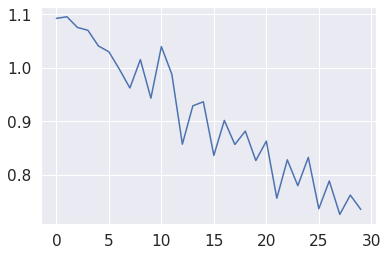

In [ ]:
# Loss Plot
plt.plot(hist.history['loss'])

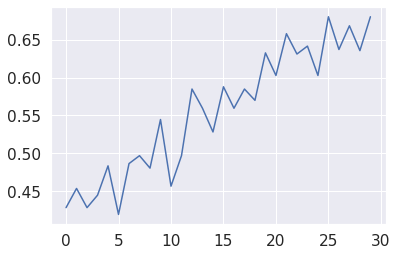

In [ ]:
# Accuracy Plot
plt.plot(hist.history['accuracy'])

### Evaluation

Now, we will evaluate our model on the test data.

In [ ]:
test_data = data_generator(test_files, 177)

In [ ]:
predictions = model_initial.predict(next(test_data)[0])

In [ ]:
pred = []
truth = []
for prediction in predictions:
  pred.append(np.argmax(prediction))
for true in next(test_data)[1]:
  truth.append(np.argmax(true))

Calculate and print accuracy.

In [ ]:
true = 0
total = len(pred)
for i in range(total):
  if pred[i] == truth[i]:
    true = true + 1
print("Accuracy =", (true/total)*100)

Accuracy = 63.2768361581921


Calculate and print Confusion Matrix. 

In [ ]:
conf_mat = np.zeros((3, 3))
c00 = 0
c11 = 0
c22 = 0
c01 = 0
c02 = 0
c10 = 0
c12 = 0
c20 = 0
c21 = 0
for i in range(total):
    if pred[i] == 0:
      if truth[i] == 0:
        c00 = c00 + 1
      elif truth[i] == 1:
        c01 = c01 + 1
      elif truth[i] == 2:
        c02 = c02 + 1
    elif pred[i] == 1:
      if truth[i] == 0:
        c10 = c10 + 1
      elif truth[i] == 1:
        c11 = c11 + 1
      elif truth[i] == 2:
        c12 = c12 + 1
    elif pred[i] == 2:
      if truth[i] == 0:
        c20 = c20 + 1
      elif truth[i] == 1:
        c21 = c21 + 1
      elif truth[i] == 2:
        c22 = c22 + 1
conf_mat[0][0] = c00
conf_mat[0][1] = c10
conf_mat[0][2] = c20
conf_mat[1][0] = c01
conf_mat[1][1] = c11
conf_mat[1][2] = c21
conf_mat[2][0] = c02
conf_mat[2][1] = c12
conf_mat[2][2] = c22

In [ ]:
def plot_confusion_matrix(conf_mat):
    classes = list(labels.keys())
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

Use the above function to plot confusion matrix here.

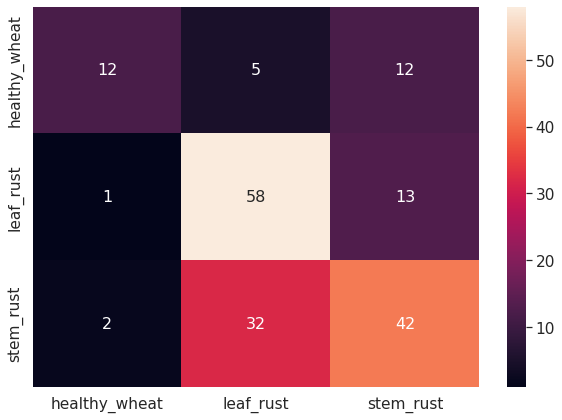

In [ ]:
plot_confusion_matrix(conf_mat)

### Changes to be made


Now that you've successfuly ran and gotten the results for the model that we built for you, make the following changes (one by one), and see how they effect the performance and the results of the model. In total, you will have the results of 5 different experiments (including those of the network already built for you)

SCREENSHOT ALL THE RESULTS (INCLUDING THOSE FOR THE MODEL WE BUILT FOR YOU) AND ADD THEM TO A PDF. 

Change #1: Change the learning rate to 0.01. <br>
Change #2: Change the epochs to 50 (make sure to change the learning rate back to 0.0001) <br>
Change #3: Change the Leaky ReLU activation to ReLU (make sure to use 30 epochs and a learning rate of 0.0001) <br>
Change #4: Increase the depth of the neural network by adding another convolutional layer (followed by the batch normalization layer, the leaky ReLU activation layer, and the dropout layer). This new piece of code will be added right before the convolution layer with the filter size of 32 in the architecture (line 14). The code to be added is as follows:     
```
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l) 
l = BatchNormalization()(l) 
l = LeakyReLU()(l) 
l = Dropout(0.2)(l) 
```
Again, this is to be added in the 14th line, i.e, between the following two lines of code in the architecture:     
```
l = Dropout(0.2)(l)
l = Conv2D(32, kernel_size=(3,3),strides=(2,2))(l)
```
You will notice that this is the exact layer collection as the previous layer. Make sure to change all the ReLU layers back to Leaky ReLU and keep the epochs at 30 and the learning rate at 0.0001 for a controlled experiment


### Questions (You might need to do research)

1) How did changing the learning rate impact your results? Why? 


2) How did changing the number of epochs impact your results? Why? 


3) How did changing the leaky relu function to a normal relu function impact your results? Why?

4) How did adding a new layer group impact your results? Why?

4) The batch normalization and the dropout layers act like regularization layers. Theoretically, what would happen if all these regularization layers are removed?

5) What is class imbalance? Is there class imbalance in this problem? Why or why not?